In [1]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp311-cp311-manylin

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import models and utilities
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# For hyperparameter tuning later
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# For Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# For Kalman Filter (we'll use a statsmodels statespace approach)
import statsmodels.api as sm

# For LSTM (Keras)
import tensorflow as tf
from tensorflow.keras import models, layers



2025-02-26 00:58:03.032097: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-26 00:58:03.033802: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-26 00:58:03.037621: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-26 00:58:03.048193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740531483.066280     373 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740531483.07

In [3]:
data=pd.read_csv("Stock Market Dataset.csv")
data_req=pd.read_csv("Stock Market Dataset.csv")
print(data.columns)
print(data.head())

Index(['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')
   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3         

In [4]:
data=data.drop(columns="Date")
data = data.replace(',', '', regex=True).astype(float)
for column in data.columns:
    print(column)
    print(data[column].dtype)

Unnamed: 0
float64
Natural_Gas_Price
float64
Natural_Gas_Vol.
float64
Crude_oil_Price
float64
Crude_oil_Vol.
float64
Copper_Price
float64
Copper_Vol.
float64
Bitcoin_Price
float64
Bitcoin_Vol.
float64
Platinum_Price
float64
Platinum_Vol.
float64
Ethereum_Price
float64
Ethereum_Vol.
float64
S&P_500_Price
float64
Nasdaq_100_Price
float64
Nasdaq_100_Vol.
float64
Apple_Price
float64
Apple_Vol.
float64
Tesla_Price
float64
Tesla_Vol.
float64
Microsoft_Price
float64
Microsoft_Vol.
float64
Silver_Price
float64
Silver_Vol.
float64
Google_Price
float64
Google_Vol.
float64
Nvidia_Price
float64
Nvidia_Vol.
float64
Berkshire_Price
float64
Berkshire_Vol.
float64
Netflix_Price
float64
Netflix_Vol.
float64
Amazon_Price
float64
Amazon_Vol.
float64
Meta_Price
float64
Meta_Vol.
float64
Gold_Price
float64
Gold_Vol.
float64


In [5]:
data['Gold_Price'] = data['Gold_Price'].astype('float64')
data['Berkshire_Price'] = data['Berkshire_Price'].astype('float64')
data['Bitcoin_Price'] = data['Bitcoin_Price'].astype('float64')
data['Platinum_Price'] = data['Platinum_Price'].astype('float64')
data['Ethereum_Price'] = data['Ethereum_Price'].astype('float64')
data['S&P_500_Price'] =data['S&P_500_Price'].astype('float64')
data['Nasdaq_100_Price'] =data['Nasdaq_100_Price'].astype('float64')

In [6]:
#finding empty values 
empty_values = data.isna().sum()
print(empty_values)

Unnamed: 0             0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64


In [7]:
# -----------------------------------------------
# STEP 1: CREATE THE ORIGINAL BROWNIAN MOTION DATA
# -----------------------------------------------
# You create a simple Brownian motion (random walk) by cumulatively summing random steps.
np.random.seed(42)
n = 300
steps = np.random.normal(loc=0, scale=1, size=n)
brownian = np.cumsum(steps)

# ------------------------------------------------
# STEP 2: INTRODUCE MULTIPLE MISSING VALUE REGIONS
# ------------------------------------------------
# Here, you introduce several disjoint intervals of missing values.
# This simulates real-world scenarios where data might be missing in multiple places.
brownian_with_nans = brownian.copy()
missing_regions = [(50, 55), (100, 102), (200, 205)]
for start, end in missing_regions:
    brownian_with_nans[start:end] = np.nan

In [8]:
# (2) Average of Neighbors:
# For each missing value, you will replace it with the average of its immediate neighbors.
# You need to handle ALL missing intervals, not just the first one.
brownian_avg = brownian_with_nans.copy()
for start, end in missing_regions:
    for i in range(start, end):
        if i > 0 and i < len(brownian_avg)-1:
            # Take average of the value before and after the missing point
            left_val = brownian_avg[i-1]
            right_val = brownian_avg[i+1]
            # Only fill if both neighbors are not NaN, otherwise, skip or handle differently
            if not np.isnan(left_val) and not np.isnan(right_val):
                brownian_avg[i] = 0.5*(left_val + right_val)
            else:
                # If a neighbor is also missing, you could choose another strategy,
                # such as forward fill or skip. For simplicity, let's forward fill here.
                brownian_avg[i] = brownian_avg[i-1]

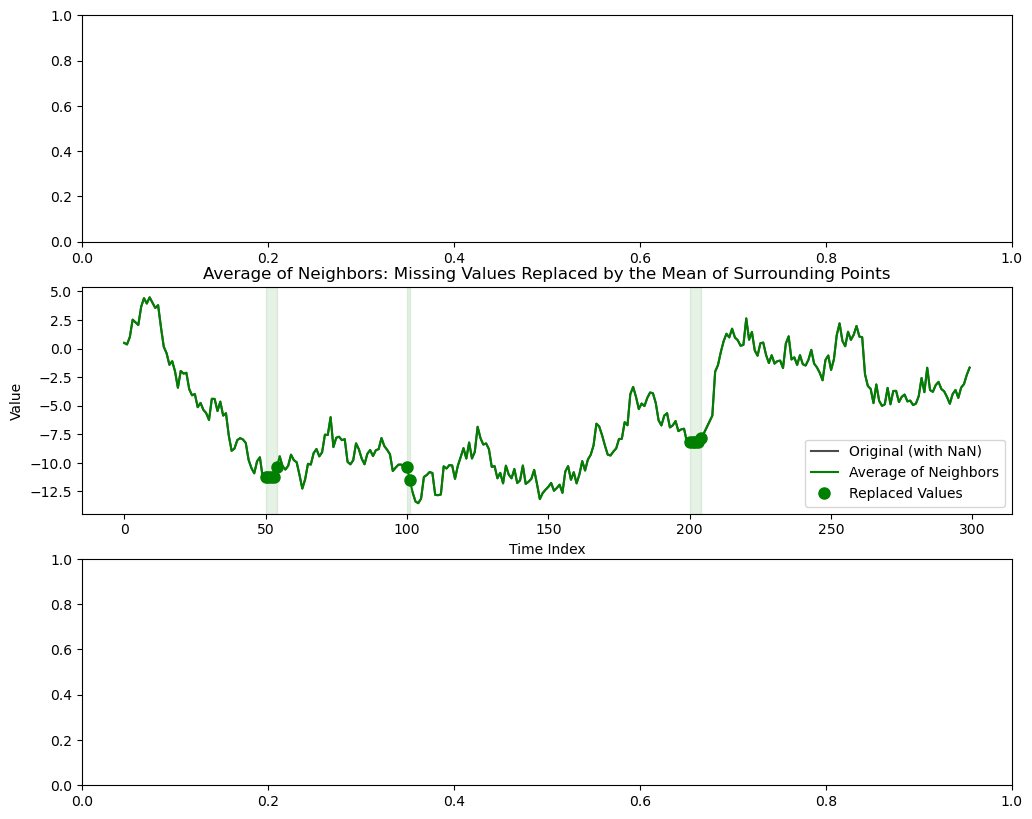

In [9]:

# ---------------------------------------------------
# STEP 4: VISUALIZATION
# ---------------------------------------------------
# You will create a subplot for each method to compare the original data (with NaNs) and the filled data.
# In each subplot:
# - The original data (with NaNs) is shown as a black line with gaps.
# - The filled data is shown in a distinct color line.
# - The missing regions are highlighted with a shaded area.
# - The replaced (filled-in) values are marked with a distinct marker in the same color as the line to draw attention.

fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# To make it easier to highlight all missing regions consistently, let's do a small helper function:
def highlight_missing_regions(ax, regions, color):
    for (start, end) in regions:
        # Highlight the missing region with a transparent shaded rectangle
        ax.axvspan(start, end-1, color=color, alpha=0.1)

def mark_filled_points(ax, original_with_nans, filled_data, regions, marker_color, marker_style):
    # Mark each originally missing value now filled
    for (start, end) in regions:
        missing_x = np.arange(start, end)
        # The filled values at these indices
        missing_y = filled_data[start:end]
        ax.plot(missing_x, missing_y, marker_style, color=marker_color, markersize=8,
                label='Replaced Values' if start == regions[0][0] else None)# Subplot 2: Average of Neighbors
# ----------------------------
# Plot original
axs[1].plot(brownian_with_nans, color='black', alpha=0.7, label='Original (with NaN)')
# Plot filled result
axs[1].plot(brownian_avg, color='green', label='Average of Neighbors')
highlight_missing_regions(axs[1], missing_regions, 'green')
mark_filled_points(axs[1], brownian_with_nans, brownian_avg, missing_regions, 'green', 'o')

axs[1].set_title("Average of Neighbors: Missing Values Replaced by the Mean of Surrounding Points")
axs[1].set_xlabel("Time Index")
axs[1].set_ylabel("Value")
axs[1].legend()


In [10]:
import numpy as np
import pandas as pd

def fill_avg_neighbors(series):
    series = series.copy()
    nan_indices = np.where(series.isna())[0]  # Get all NaN indices
    
    for i in nan_indices:
        if i==0:
            if np.isnan(series[i]):
                series[i]=series[i+1]
        if i > 0 and i < len(series) - 1:  # Ensure it's not at boundaries
            left_val = series[i - 1]
            right_val = series[i + 1]
            
            if not np.isnan(left_val) and not np.isnan(right_val):
                series[i] = 0.5 * (left_val + right_val)
            else:
                # If no valid neighbors, fallback to forward fill (or backward if at start)
                if i > 0:
                    series[i] = series[i - 1]  # Forward fill
                else:
                    series[i] = series[i + 1]  # Backward fill for first row NaN
                    
    return series

# Apply this function to all numeric columns
data = data.apply(fill_avg_neighbors, axis=0)


In [11]:
print(type(data.isna()))
empty_values = data.isna().sum()
print(empty_values)

<class 'pandas.core.frame.DataFrame'>
Unnamed: 0            0
Natural_Gas_Price     0
Natural_Gas_Vol.      0
Crude_oil_Price       0
Crude_oil_Vol.        0
Copper_Price          0
Copper_Vol.          26
Bitcoin_Price         0
Bitcoin_Vol.          0
Platinum_Price        0
Platinum_Vol.        24
Ethereum_Price        0
Ethereum_Vol.         0
S&P_500_Price         0
Nasdaq_100_Price      0
Nasdaq_100_Vol.       0
Apple_Price           0
Apple_Vol.            0
Tesla_Price           0
Tesla_Vol.            0
Microsoft_Price       0
Microsoft_Vol.        0
Silver_Price          0
Silver_Vol.           0
Google_Price          0
Google_Vol.           0
Nvidia_Price          0
Nvidia_Vol.           0
Berkshire_Price       0
Berkshire_Vol.        0
Netflix_Price         0
Netflix_Vol.          0
Amazon_Price          0
Amazon_Vol.           0
Meta_Price            0
Meta_Vol.             0
Gold_Price            0
Gold_Vol.             0
dtype: int64


In [12]:
# Assuming 'data' is your DataFrame with NaNs
columns_to_interpolate = ['Platinum_Vol.', 'Copper_Vol.']
data[columns_to_interpolate] = data[columns_to_interpolate].apply(lambda col: col.interpolate(method='linear'), axis=0)

In [13]:
data['Platinum_Vol.'] = data['Platinum_Vol.'].fillna(data['Platinum_Vol.'].mean())
data['Copper_Vol.'] = data['Copper_Vol.'].fillna(data['Copper_Vol.'].mean())

In [14]:
empty_values = data.isna().sum()
print(empty_values)

Unnamed: 0           0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64


In [15]:
for column in data.columns:
    print(column)
    print(data[column].dtype)

Unnamed: 0
float64
Natural_Gas_Price
float64
Natural_Gas_Vol.
float64
Crude_oil_Price
float64
Crude_oil_Vol.
float64
Copper_Price
float64
Copper_Vol.
float64
Bitcoin_Price
float64
Bitcoin_Vol.
float64
Platinum_Price
float64
Platinum_Vol.
float64
Ethereum_Price
float64
Ethereum_Vol.
float64
S&P_500_Price
float64
Nasdaq_100_Price
float64
Nasdaq_100_Vol.
float64
Apple_Price
float64
Apple_Vol.
float64
Tesla_Price
float64
Tesla_Vol.
float64
Microsoft_Price
float64
Microsoft_Vol.
float64
Silver_Price
float64
Silver_Vol.
float64
Google_Price
float64
Google_Vol.
float64
Nvidia_Price
float64
Nvidia_Vol.
float64
Berkshire_Price
float64
Berkshire_Vol.
float64
Netflix_Price
float64
Netflix_Vol.
float64
Amazon_Price
float64
Amazon_Vol.
float64
Meta_Price
float64
Meta_Vol.
float64
Gold_Price
float64
Gold_Vol.
float64


In [16]:
empty_values = data.isna().sum()
print(empty_values)

Unnamed: 0           0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64


In [17]:
data.head(1)
data = data.drop(data.columns[0], axis=1)

In [18]:
correlation_matrix = data.corr()
correlation_matrix = data.corr()

# Apply a mask to get values greater than 0.5 or less than -0.5
mask = (correlation_matrix > 0.5) | (correlation_matrix < -0.5)

# Get the filtered correlation values
filtered_values = correlation_matrix[mask]

# Display the filtered values
print(filtered_values)


                   Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
Natural_Gas_Price           1.000000               NaN         0.716886   
Natural_Gas_Vol.                 NaN               1.0              NaN   
Crude_oil_Price             0.716886               NaN         1.000000   
Crude_oil_Vol.                   NaN               NaN              NaN   
Copper_Price                     NaN               NaN         0.708823   
Copper_Vol.                      NaN               NaN              NaN   
Bitcoin_Price                    NaN               NaN              NaN   
Bitcoin_Vol.                     NaN               NaN              NaN   
Platinum_Price                   NaN               NaN              NaN   
Platinum_Vol.                    NaN               NaN              NaN   
Ethereum_Price                   NaN               NaN         0.600478   
Ethereum_Vol.                    NaN               NaN              NaN   
S&P_500_Price            

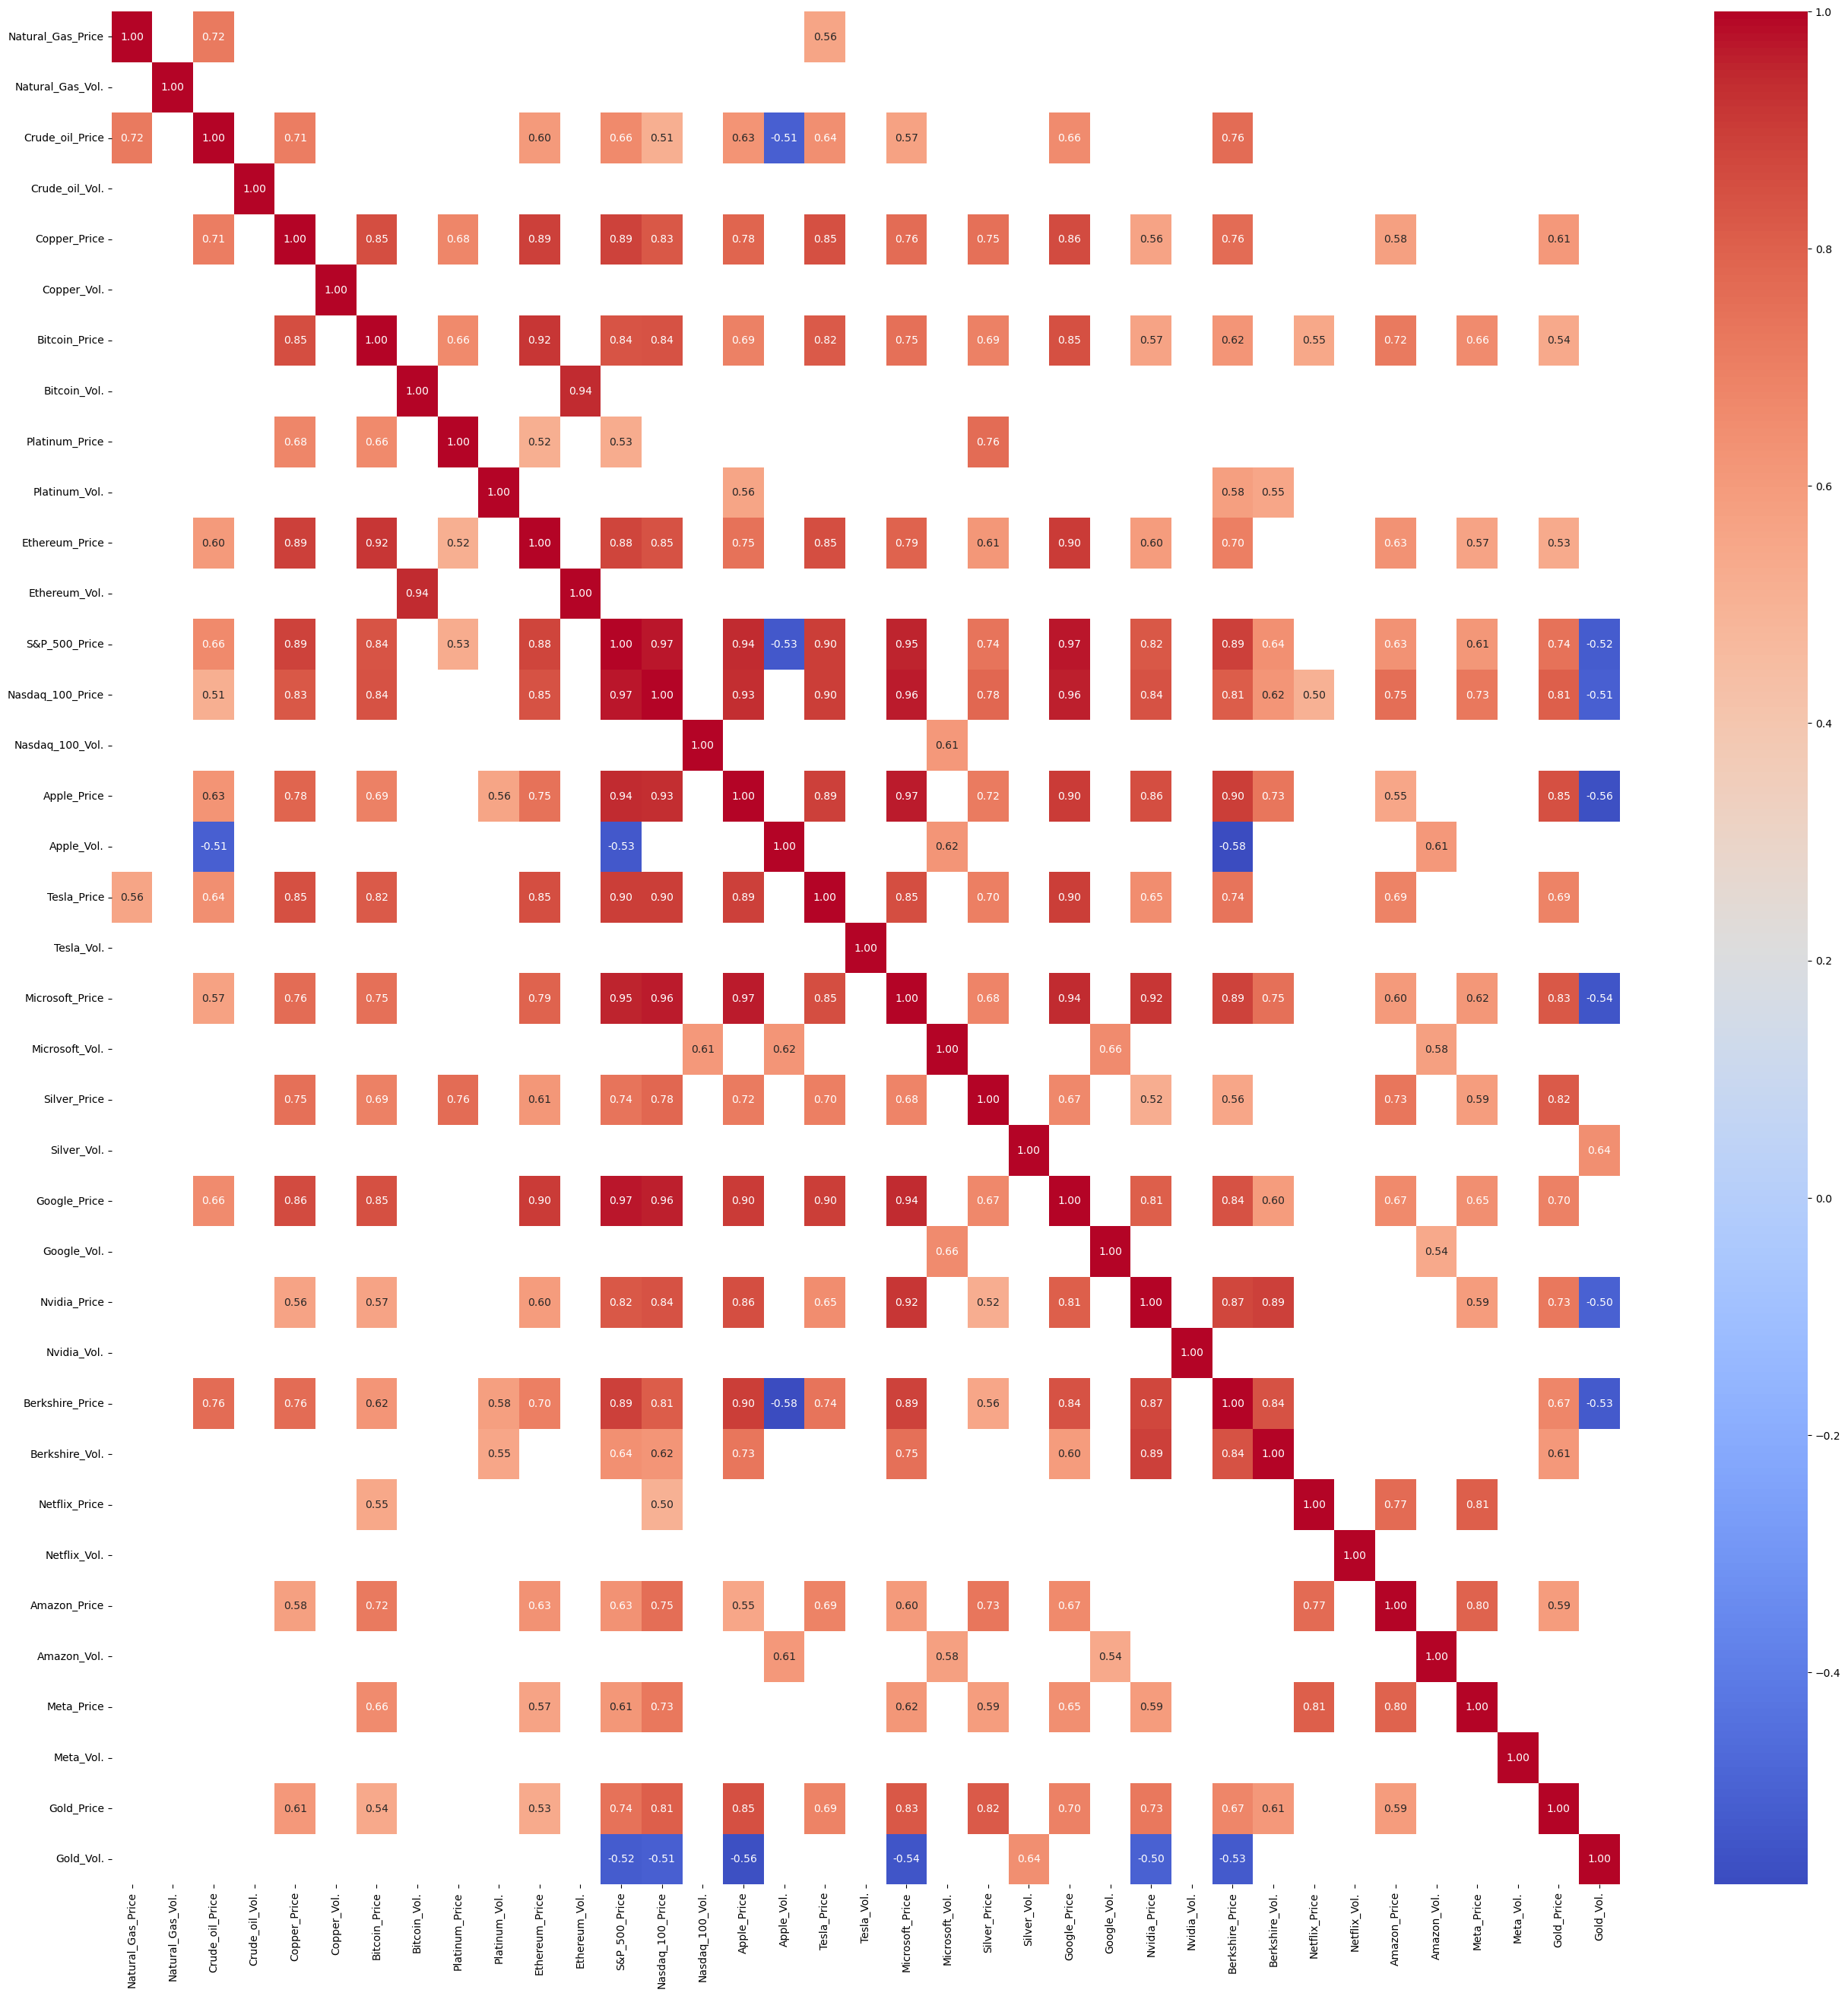

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32, 32))
# Plot heatmap of the correlation matrix
sns.heatmap(filtered_values, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [20]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def mase(y_true, y_pred, y_train):
    # mean(|y_t - y_hat_t|)/mean(|y_t - y_t-1|)
    numerator = np.mean(np.abs(y_true - y_pred))
    denominator = np.mean(np.abs(np.diff(y_train)))
    return numerator / denominator


def max_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred))

def bootstrap_confidence_intervals(predictions, residuals, alpha=0.1):
    # A simple CI approximation using std of residuals and a z-score ~1.645 for ~90% CI
    if len(residuals) == 0:
        return predictions, predictions
    std_resid = np.std(residuals)
    z_value = 1.645
    lower = predictions - z_value * std_resid
    upper = predictions + z_value * std_resid
    return lower, upper

# We'll also define a small rolling forecast helper (re-used in Section 6):
def rolling_forecast(model_constructor, train_X, train_y, test_X, test_y):
    """
    Generic rolling forecast function:
    - model_constructor: A function that returns a fresh model instance (unfitted).
    - train_X, train_y: Training data (X and y).
    - test_X, test_y: Entire test set (X and y).
    We do a 1-step ahead forecast repeatedly, updating the training set with the new actual.
    """
    history_X = train_X.copy()
    history_y = train_y.copy()
    preds = []

    for i in range(len(test_X)):
        # Instantiate and fit a new model each time
        model = model_constructor()
        model.fit(history_X, history_y)

        # Predict the next step
        x_next = test_X.iloc[i:i + 1]
        pred_next = model.predict(x_next)[0]
        preds.append(pred_next)

        # "Roll" the actual value into the training set
        y_next = test_y.iloc[i]
        history_X = pd.concat([history_X, x_next])
        history_y = pd.concat([history_y, pd.Series([y_next], index=[test_y.index[i]])])

    return np.array(preds)


# We'll define a quick function to gather metrics in a dictionary:
def compute_metrics(y_true, y_pred, y_train):
    metrics_dict = {
        'max_error': max_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAPE': mape(y_true, y_pred),
        'MASE': mase(y_true, y_pred, y_train)
    }
    return metrics_dict

In [21]:
data.columns

Index(['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

In [22]:
selected_columns = [
    "Bitcoin_Price","Copper_Price", "Platinum_Price", "Ethereum_Price", "S&P_500_Price",
    "Nasdaq_100_Price", "Apple_Price", "Tesla_Price", "Microsoft_Price",
    "Silver_Price", "Google_Price", "Nvidia_Price", "Berkshire_Price",
    "Netflix_Price", "Amazon_Price", "Meta_Price", "Gold_Price"
]

filtered_data = data[selected_columns]


In [23]:
for column in filtered_data.columns:
    print(column)
    print(data[column].dtype)

Bitcoin_Price
float64
Copper_Price
float64
Platinum_Price
float64
Ethereum_Price
float64
S&P_500_Price
float64
Nasdaq_100_Price
float64
Apple_Price
float64
Tesla_Price
float64
Microsoft_Price
float64
Silver_Price
float64
Google_Price
float64
Nvidia_Price
float64
Berkshire_Price
float64
Netflix_Price
float64
Amazon_Price
float64
Meta_Price
float64
Gold_Price
float64


In [24]:
empty_values = filtered_data.isna().sum()
print(empty_values)

Bitcoin_Price       0
Copper_Price        0
Platinum_Price      0
Ethereum_Price      0
S&P_500_Price       0
Nasdaq_100_Price    0
Apple_Price         0
Tesla_Price         0
Microsoft_Price     0
Silver_Price        0
Google_Price        0
Nvidia_Price        0
Berkshire_Price     0
Netflix_Price       0
Amazon_Price        0
Meta_Price          0
Gold_Price          0
dtype: int64


In [25]:
#VAR implemenetation
# For VAR, we need a stationary or at least stable process. 
# Often you'd difference or transform. Here, for simplicity, we'll just use the raw data.
# In practice, you should check stationarity and differ if needed.

n = len(filtered_data)
train_size = int(n * 0.8)
target_col = 'Bitcoin_Price'

train_df = filtered_data.iloc[:train_size]
test_df = filtered_data.iloc[train_size:]

z_val = 1.645  # ~90% CI



In [26]:
print(train_df.isnull().sum())  # Ensure no NaNs exist
print(train_df.dtypes)  # Ensure all columns are numeric


Bitcoin_Price       0
Copper_Price        0
Platinum_Price      0
Ethereum_Price      0
S&P_500_Price       0
Nasdaq_100_Price    0
Apple_Price         0
Tesla_Price         0
Microsoft_Price     0
Silver_Price        0
Google_Price        0
Nvidia_Price        0
Berkshire_Price     0
Netflix_Price       0
Amazon_Price        0
Meta_Price          0
Gold_Price          0
dtype: int64
Bitcoin_Price       float64
Copper_Price        float64
Platinum_Price      float64
Ethereum_Price      float64
S&P_500_Price       float64
Nasdaq_100_Price    float64
Apple_Price         float64
Tesla_Price         float64
Microsoft_Price     float64
Silver_Price        float64
Google_Price        float64
Nvidia_Price        float64
Berkshire_Price     float64
Netflix_Price       float64
Amazon_Price        float64
Meta_Price          float64
Gold_Price          float64
dtype: object


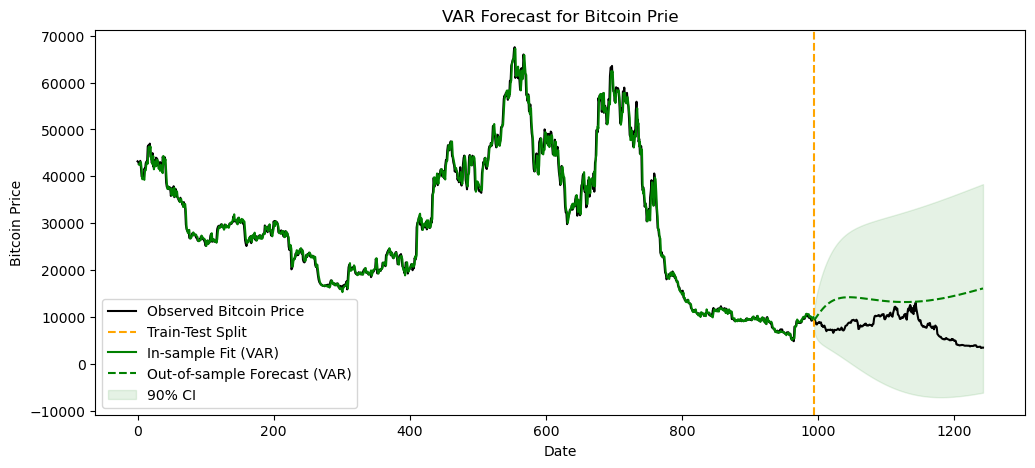

In [27]:
model_var = VAR(train_df)
results_var = model_var.fit(maxlags=2)  # You can vary this lag

# Forecast the test period
lag_order = results_var.k_ar
input_data = train_df.values[-lag_order:]
var_forecast = results_var.forecast(input_data, steps=len(test_df))
var_forecast_df = pd.DataFrame(var_forecast, index=test_df.index, columns=filtered_data.columns)

# Extract the ENSO forecasts
BP_var_forecast = var_forecast_df[target_col]

# Compute 90% CI for VAR forecasts
# VAR results have covariance info for forecasts.
# We'll use the forecast_cov method, which only needs 'steps'.
fcst_cov = results_var.forecast_cov(steps=len(test_df))

# Extract diagonal corresponding to ENSO index.
BP_idx = filtered_data.columns.get_loc('Bitcoin_Price')
std_enso = []
for i in range(len(test_df)):
    var_cov_matrix = fcst_cov[i]
    std_enso.append(np.sqrt(var_cov_matrix[BP_idx, BP_idx]))

std_enso = np.array(std_enso)
var_lower = BP_var_forecast - z_val * std_enso
var_upper = BP_var_forecast + z_val * std_enso

# In-sample fit for ENSO (pseudo in-sample predictions)
BP_in_sample = results_var.fittedvalues['Bitcoin_Price'].reindex(train_df.index)

plt.figure(figsize=(12, 5))
plt.plot(filtered_data.index, filtered_data['Bitcoin_Price'], label='Observed Bitcoin Price', color='black')
plt.axvline(x=filtered_data.index[train_size], color='orange', linestyle='--', label='Train-Test Split')

plt.plot(BP_in_sample.index, BP_in_sample, label='In-sample Fit (VAR)', color='green')

plt.plot(test_df.index, BP_var_forecast, label='Out-of-sample Forecast (VAR)', color='green', linestyle='--')
plt.fill_between(test_df.index, var_lower, var_upper, color='green', alpha=0.1, label='90% CI')

plt.title("VAR Forecast for Bitcoin Prie")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()

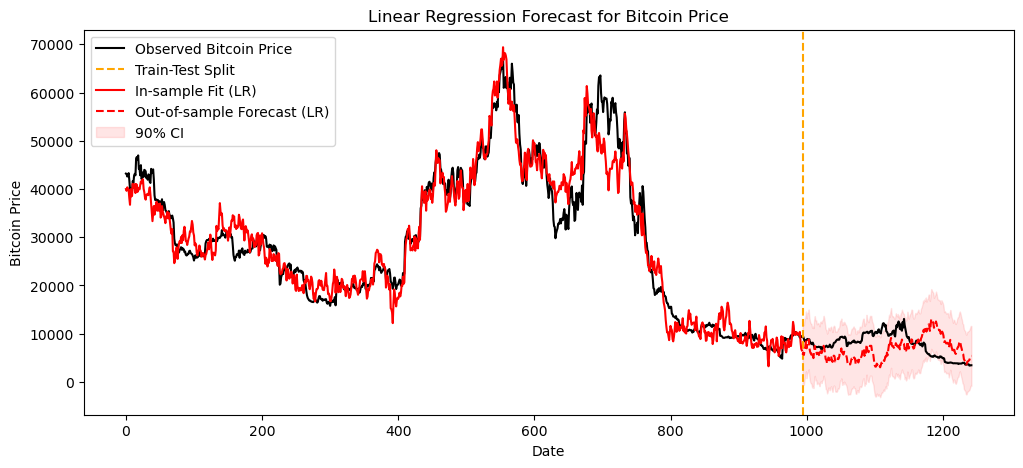

In [28]:
# Prepare data
target_col = 'Bitcoin_Price'
X = filtered_data.drop(columns=[target_col])
y = filtered_data[target_col]

n = len(filtered_data)
train_size = int(n * 0.8)
train_X, test_X = X.iloc[:train_size], X.iloc[train_size:]
train_y, test_y = y.iloc[:train_size], y.iloc[train_size:]

# Fit linear regression
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

# In-sample fitted values
fitted_values = lr_model.predict(train_X)

# Out-of-sample forecast
forecast_values = lr_model.predict(test_X)

# Compute 90% CI for the forecast
# Assuming normal errors, CI = forecast ± z * std_err
# We'll estimate std_err from residuals in training set
residuals = train_y - fitted_values
std_res = np.std(residuals)
z_val = 1.645  # ~90% CI
lower_ci = forecast_values - z_val * std_res
upper_ci = forecast_values + z_val * std_res

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(y.index, y.values, label='Observed Bitcoin Price', color='black')
plt.axvline(x=y.index[train_size], color='orange', linestyle='--', label='Train-Test Split')

# In-sample fitted
plt.plot(train_y.index, fitted_values, label='In-sample Fit (LR)', color='red')

# Out-of-sample forecast
plt.plot(test_y.index, forecast_values, label='Out-of-sample Forecast (LR)', color='red', linestyle='--')
plt.fill_between(test_y.index, lower_ci, upper_ci, color='red', alpha=0.1, label='90% CI')

plt.title("Linear Regression Forecast for Bitcoin Price")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()

In [29]:
# We already have forecast_values (LR) and enso_var_forecast (VAR)
simple_metrics = pd.DataFrame(columns=["max_error", "MAE", "MSE", "RMSE", "MAPE", "MASE"], index=["LinearReg", "VAR"])

test_actual = test_y.values
test_train = train_y.values  # for MASE calculation

# For Linear Regression
simple_metrics.loc["LinearReg", "max_error"] = max_error(test_actual, forecast_values)
simple_metrics.loc["LinearReg", "MAE"] = mean_absolute_error(test_actual, forecast_values)
simple_metrics.loc["LinearReg", "MSE"] = mean_squared_error(test_actual, forecast_values)
simple_metrics.loc["LinearReg", "RMSE"] = rmse(test_actual, forecast_values)
simple_metrics.loc["LinearReg", "MAPE"] = mape(test_actual, forecast_values)
simple_metrics.loc["LinearReg", "MASE"] = mase(test_actual, forecast_values, test_train)

# For VAR
var_fc = BP_var_forecast.values
simple_metrics.loc["VAR", "max_error"] = max_error(test_actual, var_fc)
simple_metrics.loc["VAR", "MAE"] = mean_absolute_error(test_actual, var_fc)
simple_metrics.loc["VAR", "MSE"] = mean_squared_error(test_actual, var_fc)
simple_metrics.loc["VAR", "RMSE"] = rmse(test_actual, var_fc)
simple_metrics.loc["VAR", "MAPE"] = mape(test_actual, var_fc)
simple_metrics.loc["VAR", "MASE"] = mase(test_actual, var_fc, test_train)

print("Simple Out-of-Sample Forecasting Accuracy:")
print(simple_metrics)



Simple Out-of-Sample Forecasting Accuracy:
              max_error          MAE              MSE         RMSE  \
LinearReg   7834.577048   3283.63157  14546414.164035  3813.976162   
VAR        12626.799056  5943.313492  45561514.119588  6749.926971   

                 MAPE      MASE  
LinearReg   46.602527  3.778913  
VAR        104.113818  6.839763  


In [30]:
print(data_req["Date"].head())  # Check sample values
print(data_req["Date"].dtype)  # Check data type
print(data_req["Date"].isna().sum())  # Check missing values


0    02-02-2024
1    01-02-2024
2    31-01-2024
3    30-01-2024
4    29-01-2024
Name: Date, dtype: object
object
0


In [31]:
# --------------------------
# Step 1: Load and prepare data
# --------------------------
print(filtered_data.columns)
print(data_req["Date"].dtype)
filtered_data["Date"] = data_req["Date"]

empty_values = filtered_data.isna().sum()
print(empty_values)
print(filtered_data.columns)
print(filtered_data.dtypes)

Index(['Bitcoin_Price', 'Copper_Price', 'Platinum_Price', 'Ethereum_Price',
       'S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Tesla_Price',
       'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price',
       'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price',
       'Gold_Price'],
      dtype='object')
object
Bitcoin_Price       0
Copper_Price        0
Platinum_Price      0
Ethereum_Price      0
S&P_500_Price       0
Nasdaq_100_Price    0
Apple_Price         0
Tesla_Price         0
Microsoft_Price     0
Silver_Price        0
Google_Price        0
Nvidia_Price        0
Berkshire_Price     0
Netflix_Price       0
Amazon_Price        0
Meta_Price          0
Gold_Price          0
Date                0
dtype: int64
Index(['Bitcoin_Price', 'Copper_Price', 'Platinum_Price', 'Ethereum_Price',
       'S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Tesla_Price',
       'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price',
       'Berkshire_P

/tmp/ipykernel_373/485198339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Date"] = data_req["Date"]


/tmp/ipykernel_373/303693643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], format='%d-%m-%Y')


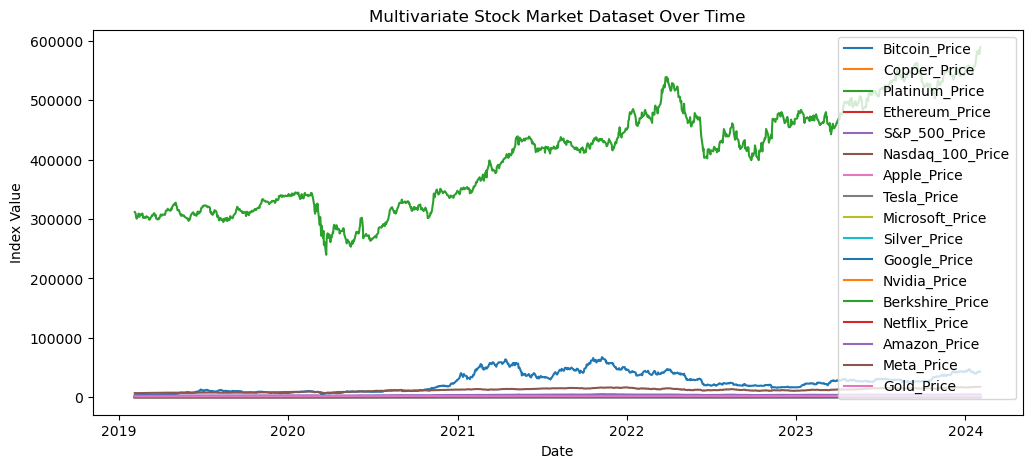

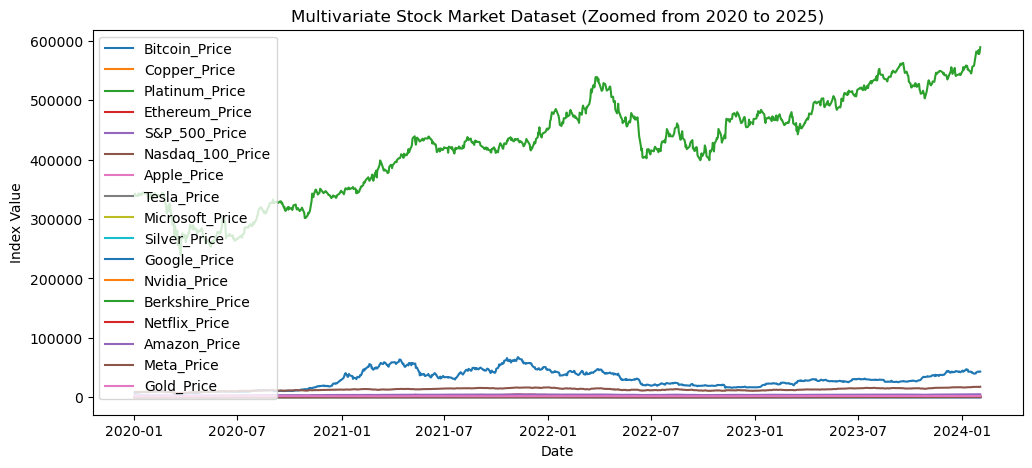

In [32]:
# Ensure the 'Date' column is in datetime format
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], format='%d-%m-%Y')

# Set the 'Date' column as index and sort it
df = filtered_data.set_index('Date').sort_index()

# Interpolate missing values
df.interpolate(method='linear', inplace=True)

# Create X and y
X = df.drop(columns=[target_col])  # All columns except the target column
y = df[target_col]

# --------------------------
# Visualization of the full series
# --------------------------
plt.figure(figsize=(12, 5))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
plt.title("Multivariate Stock Market Dataset Over Time")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()

# --------------------------
# 1B. Zoomed Plot (Approx. 2020 - 2025)
# --------------------------
zoom_start = pd.to_datetime('01-01-2020')
zoom_end = pd.to_datetime('02-02-2024')

# Filter the data based on the zoomed date range
df_zoom = df.loc[zoom_start:zoom_end]

plt.figure(figsize=(12, 5))
for col in df_zoom.columns:
    plt.plot(df_zoom.index, df_zoom[col], label=col)
plt.title("Multivariate Stock Market Dataset (Zoomed from 2020 to 2025)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.show()


Copper_Price        0
Platinum_Price      0
Ethereum_Price      0
S&P_500_Price       0
Nasdaq_100_Price    0
Apple_Price         0
Tesla_Price         0
Microsoft_Price     0
Silver_Price        0
Google_Price        0
Nvidia_Price        0
Berkshire_Price     0
Netflix_Price       0
Amazon_Price        0
Meta_Price          0
Gold_Price          0
dtype: int64
0


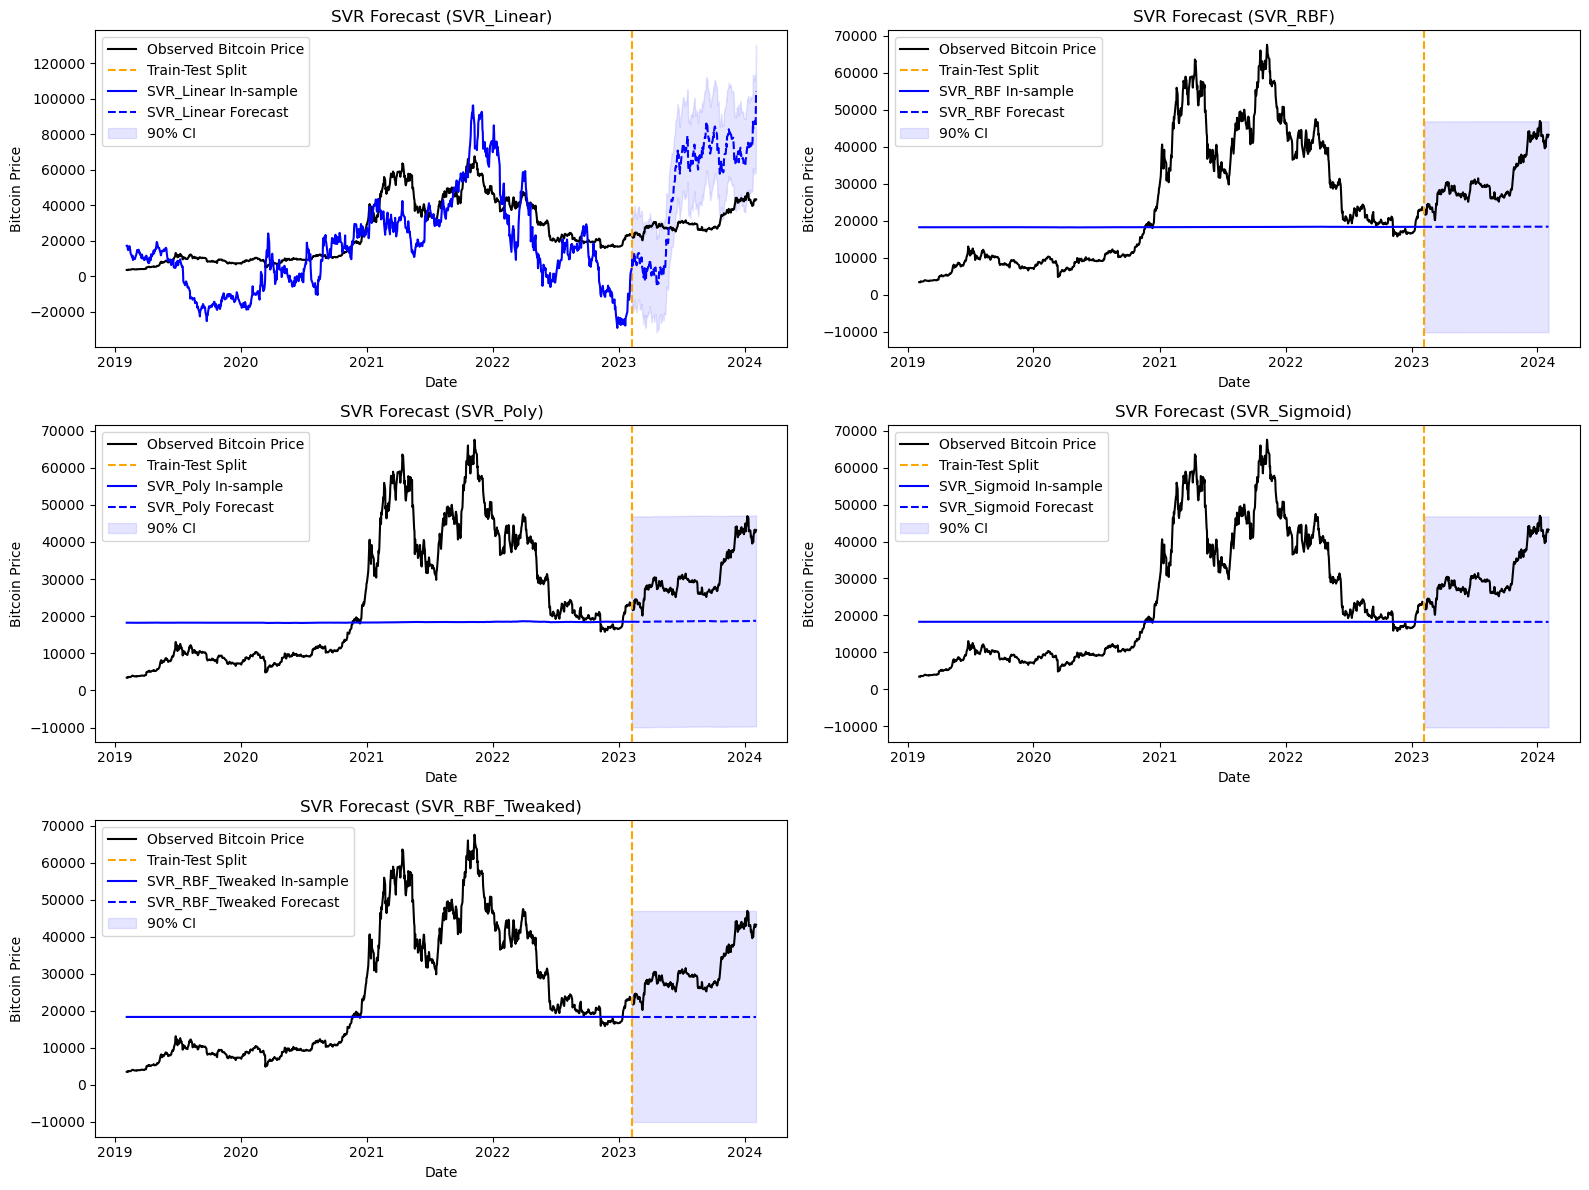

In [33]:
# --------------------------
# Step 2: Train/test split
# --------------------------
train_ratio = 0.8
n = len(df)
split_index = int(n * train_ratio)

train_X = X.iloc[:split_index]
train_y = y.iloc[:split_index]
test_X = X.iloc[split_index:]
test_y = y.iloc[split_index:]

print(train_X.isnull().sum())  # To check missing values in X
print(train_y.isnull().sum())  # To check missing values in y


# --------------------------
# Step 3: Fit various SVR models (different kernels) on training data
# --------------------------
# We'll demonstrate several kernels: 'linear', 'rbf', 'poly', 'sigmoid', and a tweaked RBF.
svr_models = {
    'SVR_Linear': SVR(kernel='linear', C=1.0, epsilon=0.1),
    'SVR_RBF': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'SVR_Poly': SVR(kernel='poly', C=1.0, epsilon=0.1, degree=2),
    'SVR_Sigmoid': SVR(kernel='sigmoid', C=1.0, epsilon=0.1),
    'SVR_RBF_Tweaked': SVR(kernel='rbf', C=10.0, gamma=0.1, epsilon=0.1)
}

results_svr = {}

for model_name, svr_model in svr_models.items():
    svr_model.fit(train_X, train_y)
    # In-sample fitted values
    in_sample_fit = svr_model.predict(train_X)
    # Out-of-sample forecast
    out_sample_pred = svr_model.predict(test_X)

    results_svr[model_name] = {
        'model': svr_model,
        'in_sample_fit': in_sample_fit,
        'out_sample_pred': out_sample_pred
    }

# --------------------------
# Step 4: Visualize forecasts for each SVR model
# --------------------------
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()  # To index them easily in a loop

model_names = list(results_svr.keys())  # e.g. ['SVR_Linear', 'SVR_RBF', 'SVR_Poly', 'SVR_Sigmoid', 'SVR_RBF_Tweaked']

for i, model_name in enumerate(model_names):
    ax = axes[i]

    # Retrieve the in-sample fit and out-of-sample predictions
    in_sample_fit = results_svr[model_name]['in_sample_fit']
    out_sample_pred = results_svr[model_name]['out_sample_pred']

    # Calculate residuals on training set for CI computation
    train_residuals = train_y.values - in_sample_fit
    lower_ci, upper_ci = bootstrap_confidence_intervals(out_sample_pred, train_residuals)

    # Plot observed series
    ax.plot(y.index, y, label='Observed Bitcoin Price', color='black')
    # Train-test split line
    ax.axvline(x=y.index[split_index], color='orange', linestyle='--', label='Train-Test Split')
    # In-sample fit
    ax.plot(train_y.index, in_sample_fit, label=f'{model_name} In-sample', color='blue')
    # Out-of-sample forecast
    ax.plot(test_y.index, out_sample_pred, label=f'{model_name} Forecast', color='blue', linestyle='--')
    # Confidence bands
    ax.fill_between(test_y.index, lower_ci, upper_ci, color='blue', alpha=0.1, label='90% CI')

    ax.set_title(f"SVR Forecast ({model_name})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Bitcoin Price")
    ax.legend()

# Hide any unused subplots
if len(axes) > len(model_names):
    for j in range(len(model_names), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()
plt.show()

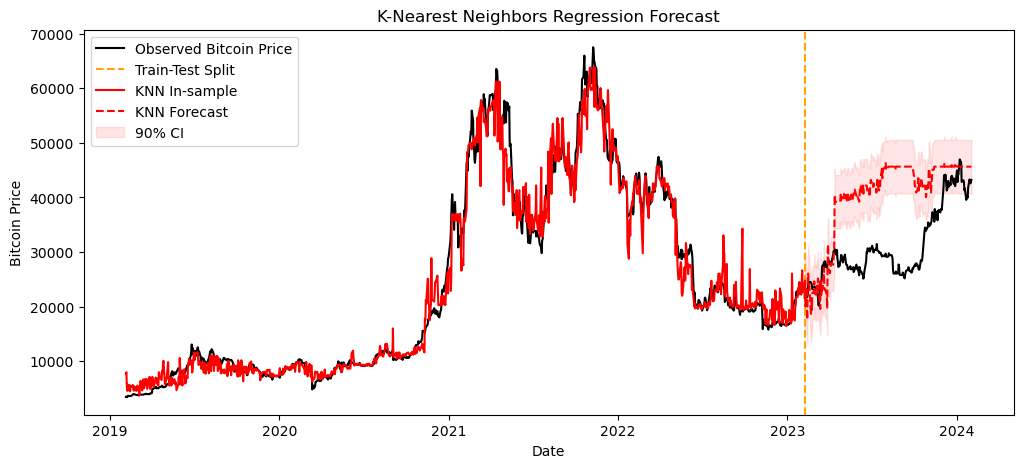

In [34]:
# Import KNeighborsRegressor is already done above.
knn_model = KNeighborsRegressor(n_neighbors=5, metric='euclidean')  # You may vary n_neighbors
# LINK TO LIST OF METRICS: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

# ‘euclidean’
# ‘cityblock’
# ‘manhattan’
# --- Einstein's Metric: Lorentzian

knn_model.fit(train_X, train_y)

knn_in_sample_fit = knn_model.predict(train_X)
knn_out_sample_pred = knn_model.predict(test_X)

# Residuals for confidence intervals from the training set
knn_residuals = train_y.values - knn_in_sample_fit
knn_lower_ci, knn_upper_ci = bootstrap_confidence_intervals(knn_out_sample_pred, knn_residuals)

# Visualization for KNN
plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label='Observed Bitcoin Price', color='black')
plt.axvline(x=y.index[split_index], color='orange', linestyle='--', label='Train-Test Split')
plt.plot(train_y.index, knn_in_sample_fit, label='KNN In-sample', color='red')
plt.plot(test_y.index, knn_out_sample_pred, label='KNN Forecast', color='red', linestyle='--')
plt.fill_between(test_y.index, knn_lower_ci, knn_upper_ci, color='red', alpha=0.1, label='90% CI')
plt.title("K-Nearest Neighbors Regression Forecast")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


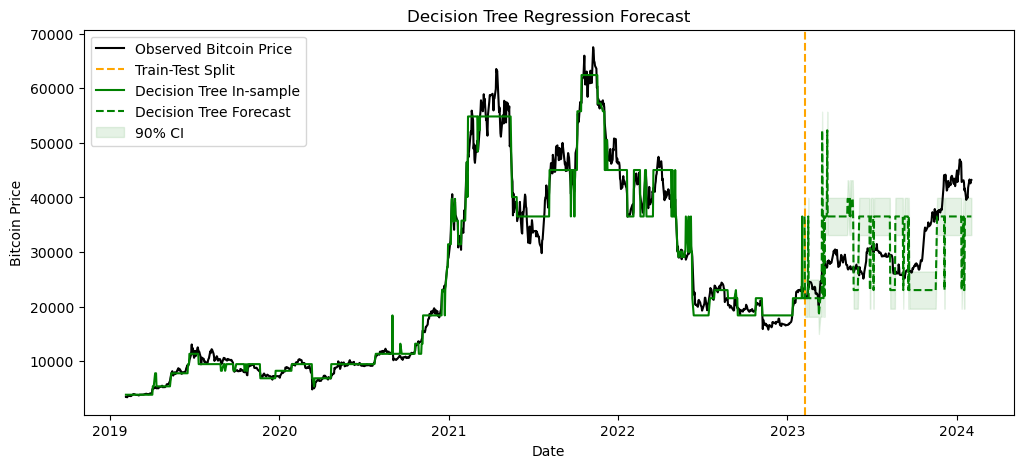

In [35]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(train_X, train_y)

tree_in_sample_fit = tree_model.predict(train_X)
tree_out_sample_pred = tree_model.predict(test_X)

tree_residuals = train_y.values - tree_in_sample_fit
tree_lower_ci, tree_upper_ci = bootstrap_confidence_intervals(tree_out_sample_pred, tree_residuals)

plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label='Observed Bitcoin Price', color='black')
plt.axvline(x=y.index[split_index], color='orange', linestyle='--', label='Train-Test Split')
plt.plot(train_y.index, tree_in_sample_fit, label='Decision Tree In-sample', color='green')
plt.plot(test_y.index, tree_out_sample_pred, label='Decision Tree Forecast', color='green', linestyle='--')
plt.fill_between(test_y.index, tree_lower_ci, tree_upper_ci, color='green', alpha=0.1, label='90% CI')
plt.title("Decision Tree Regression Forecast")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


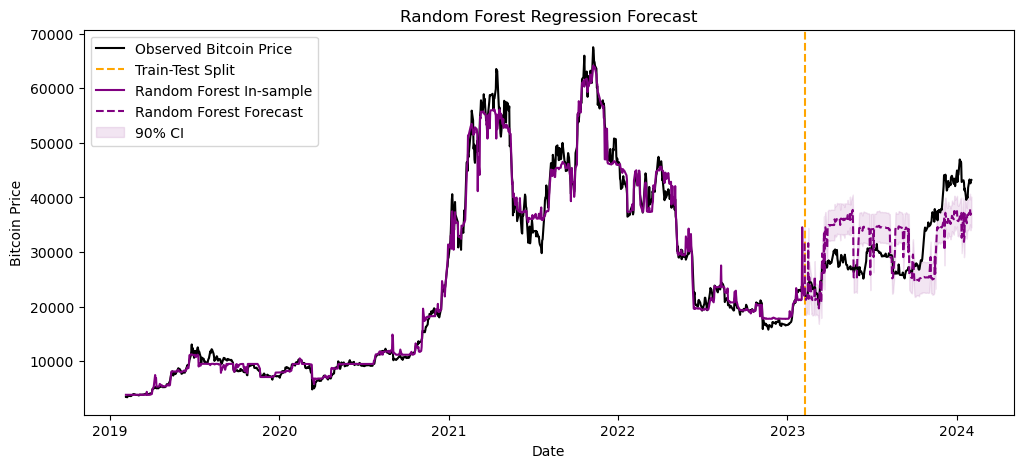

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(train_X, train_y)

rf_in_sample_fit = rf_model.predict(train_X)
rf_out_sample_pred = rf_model.predict(test_X)

rf_residuals = train_y.values - rf_in_sample_fit
rf_lower_ci, rf_upper_ci = bootstrap_confidence_intervals(rf_out_sample_pred, rf_residuals)

plt.figure(figsize=(12, 5))
plt.plot(y.index, y, label='Observed Bitcoin Price', color='black')
plt.axvline(x=y.index[split_index], color='orange', linestyle='--', label='Train-Test Split')
plt.plot(train_y.index, rf_in_sample_fit, label='Random Forest In-sample', color='purple')
plt.plot(test_y.index, rf_out_sample_pred, label='Random Forest Forecast', color='purple', linestyle='--')
plt.fill_between(test_y.index, rf_lower_ci, rf_upper_ci, color='purple', alpha=0.1, label='90% CI')
plt.title("Random Forest Regression Forecast")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


In [37]:
# Use predictions from one chosen forecast per model
svr_rbf_out = results_svr['SVR_RBF']['out_sample_pred']
knn_out = knn_out_sample_pred
tree_out = tree_out_sample_pred
rf_out = rf_out_sample_pred

test_actual = test_y.values  # True values in test set
train_actual = train_y.values

def compute_metrics(y_true, y_pred, y_train):
    return {
        'max_error': max_error(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': rmse(y_true, y_pred),
        'MAPE': mape(y_true, y_pred),
        'MASE': mase(y_true, y_pred, y_train)
    }

models_simple = {
    'SVR_RBF': svr_rbf_out,
    'KNN': knn_out,
    'DecisionTree': tree_out,
    'RandomForest': rf_out
}

simple_results = {}
for m_name, preds in models_simple.items():
    simple_results[m_name] = compute_metrics(test_actual, preds, train_actual)

df_simple_results = pd.DataFrame(simple_results).T
print("Simple Out-of-Sample Forecasting Accuracy (Metrics):")
print(df_simple_results)


Simple Out-of-Sample Forecasting Accuracy (Metrics):
                 max_error           MAE           MSE          RMSE  \
SVR_RBF       28545.036482  12544.897633  1.988709e+08  14102.160888   
KNN           20480.600000   9690.058876  1.318589e+08  11482.984823   
DecisionTree  25048.800000   7208.100519  6.811523e+07   8253.195140   
RandomForest  13421.255135   5433.814040  3.849713e+07   6204.605312   

                   MAPE       MASE  
SVR_RBF       38.214034  16.246917  
KNN           33.763539  12.549611  
DecisionTree  23.629855   9.335223  
RandomForest  17.495915   7.037341  


In [38]:
def rolling_forecast(model_constructor, train_X, train_y, test_X, test_y):
    """
    Generic rolling forecast function:
      - model_constructor: a function that returns a fresh model instance
      - train_X, train_y: initial training data
      - test_X, test_y: the entire test set
    Forecast one step ahead iteratively.
    """
    history_X = train_X.copy()
    history_y = train_y.copy()
    preds = []

    for i in range(len(test_X)):
        # Instantiate and fit a new model
        model = model_constructor()
        model.fit(history_X, history_y)

        # Predict the next step
        x_next = test_X.iloc[i:i + 1]  # single step
        pred_next = model.predict(x_next)[0]
        preds.append(pred_next)

        # "Roll" forward: add the actual observation to the history
        y_next = test_y.iloc[i]
        history_X = pd.concat([history_X, x_next])
        history_y = pd.concat([history_y, pd.Series([y_next], index=[test_y.index[i]])])

    return np.array(preds)

# Define constructors for each model for rolling forecasts

def svr_rbf_constructor():
    return SVR(kernel='rbf', C=1.0, epsilon=0.1)

def knn_constructor():
    return KNeighborsRegressor(n_neighbors=5)

def tree_constructor():
    return DecisionTreeRegressor(max_depth=5, random_state=42)

def rf_constructor():
    return RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Perform rolling forecasts
svr_rbf_rolling = rolling_forecast(svr_rbf_constructor, train_X, train_y, test_X, test_y)
knn_rolling = rolling_forecast(knn_constructor, train_X, train_y, test_X, test_y)
tree_rolling = rolling_forecast(tree_constructor, train_X, train_y, test_X, test_y)
rf_rolling = rolling_forecast(rf_constructor, train_X, train_y, test_X, test_y)

models_rolling = {
    'SVR_RBF': svr_rbf_rolling,
    'KNN': knn_rolling,
    'DecisionTree': tree_rolling,
    'RandomForest': rf_rolling
}

rolling_results = {}
for m_name, preds in models_rolling.items():
    rolling_results[m_name] = compute_metrics(test_actual, preds, train_actual)

df_rolling_results = pd.DataFrame(rolling_results).T
print("\nRolling Forecasting Accuracy (Metrics):")
print(df_rolling_results)



Rolling Forecasting Accuracy (Metrics):
                 max_error           MAE           MSE          RMSE  \
SVR_RBF       24101.817261  10382.945582  1.360364e+08  11663.465785   
KNN           17238.280000   5029.000723  3.974602e+07   6304.444312   
DecisionTree  24919.200000   2285.901330  1.340546e+07   3661.347082   
RandomForest   8336.855900   1784.506512  6.134111e+06   2476.713800   

                   MAPE       MASE  
SVR_RBF       31.663281  13.446970  
KNN           16.001068   6.513067  
DecisionTree   7.290907   2.960475  
RandomForest   5.607680   2.311117  


In [39]:
print("\nHyperparameter Optimization Results\n")

# --- Helper function for metrics (if not already defined) ---
def compute_metrics(y_true, y_pred, y_train):
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    metrics = {
        'max_error': np.max(np.abs(y_true - y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100,
        'MASE': np.mean(np.abs(y_true - y_pred)) / np.mean(np.abs(np.diff(y_train)))
    }
    return metrics

# ---------- SVR Hyperparameter Tuning ----------
pipeline_svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])
param_grid_svr = {
    'svr__C': [0.1, 1.0, 10.0],
    'svr__epsilon': [0.01, 0.1],
    'svr__gamma': ['scale', 0.1],
    'svr__kernel': ['rbf', 'sigmoid', 'poly']
}
grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=3,
                               scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(train_X, train_y)
best_svr = grid_search_svr.best_estimator_
print("Best SVR Parameters:", grid_search_svr.best_params_)
svr_pred = best_svr.predict(test_X)
svr_metrics = compute_metrics(test_y.values, svr_pred, train_y.values)

# ---------- KNN Hyperparameter Tuning ----------
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7]
}
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=3,
                               scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(train_X, train_y)
best_knn = grid_search_knn.best_estimator_
print("\nBest KNN Parameters:", grid_search_knn.best_params_)
knn_pred = best_knn.predict(test_X)
knn_metrics = compute_metrics(test_y.values, knn_pred, train_y.values)

# ---------- Decision Tree Hyperparameter Tuning ----------
param_grid_tree = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42),
                                param_grid_tree, cv=3,
                                scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(train_X, train_y)
best_tree = grid_search_tree.best_estimator_
print("\nBest Decision Tree Parameters:", grid_search_tree.best_params_)
tree_pred = best_tree.predict(test_X)
tree_metrics = compute_metrics(test_y.values, tree_pred, train_y.values)

# ---------- Random Forest Hyperparameter Tuning ----------
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                              param_grid_rf, cv=3,
                              scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(train_X, train_y)
best_rf = grid_search_rf.best_estimator_
print("\nBest Random Forest Parameters:", grid_search_rf.best_params_)
rf_pred = best_rf.predict(test_X)
rf_metrics = compute_metrics(test_y.values, rf_pred, train_y.values)

# ---------- Compile Metrics into a Table ----------
results_hp = {
    'SVR_RBF': svr_metrics,
    'KNN': knn_metrics,
    'DecisionTree': tree_metrics,
    'RandomForest': rf_metrics
}

df_results = pd.DataFrame(results_hp).T
# Optionally, reorder the columns:
df_results = df_results[['max_error', 'MAE', 'MSE', 'RMSE', 'MAPE', 'MASE']]
print("\nSimple Out-of-Sample Forecasting Accuracy (Metrics):")
print(df_results)



Hyperparameter Optimization Results

Best SVR Parameters: {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__gamma': 'scale', 'svr__kernel': 'poly'}

Best KNN Parameters: {'knn__n_neighbors': 7}

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_split': 2}


/opt/conda/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Random Forest Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}

Simple Out-of-Sample Forecasting Accuracy (Metrics):
                 max_error          MAE           MSE          RMSE  \
SVR_RBF       27407.151088  4617.952857  3.751364e+07   6124.838030   
KNN           18689.585714  7649.074010  8.520413e+07   9230.608439   
DecisionTree  21155.946038  9648.770096  1.332950e+08  11545.345715   
RandomForest  17024.644907  7543.393888  8.895035e+07   9431.349561   

                   MAPE       MASE  
SVR_RBF       14.820557   5.980718  
KNN           26.549830   9.906328  
DecisionTree  33.173359  12.496138  
RandomForest  26.154550   9.769462  


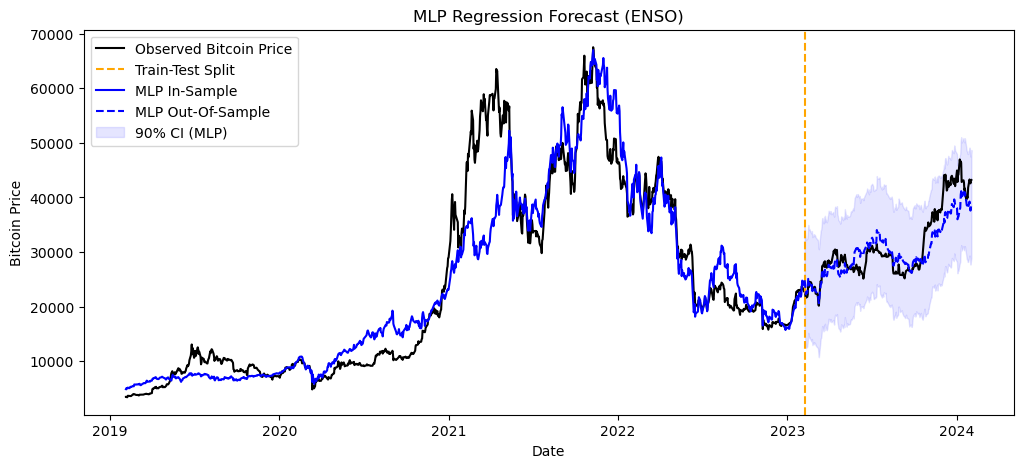

In [40]:
from sklearn.neural_network import MLPRegressor

#---------------------
# 1A. MLP Regressor
#---------------------

mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50),
                         activation='relu',
                         solver='adam',
                         random_state=42,
                         max_iter=2000)

mlp_model.fit(train_X, train_y)

# In-sample fit
mlp_in_sample = mlp_model.predict(train_X)
mlp_residuals = train_y.values - mlp_in_sample

# Out-of-sample
mlp_out_of_sample = mlp_model.predict(test_X)

# CI for out-of-sample
mlp_lower_ci, mlp_upper_ci = bootstrap_confidence_intervals(mlp_out_of_sample, mlp_residuals)

#-----------------------
# Visualization - MLP
#-----------------------
plt.figure(figsize=(12, 5))
plt.plot(y.index, y.values, label='Observed Bitcoin Price', color='black')
plt.axvline(x=y.index[split_index], color='orange', linestyle='--', label='Train-Test Split')

# MLP in-sample
plt.plot(train_y.index, mlp_in_sample, label='MLP In-Sample', color='blue')
# MLP out-of-sample
plt.plot(test_y.index, mlp_out_of_sample, label='MLP Out-Of-Sample', color='blue', linestyle='--')
# MLP CI
plt.fill_between(test_y.index, mlp_lower_ci, mlp_upper_ci, color='blue', alpha=0.1, label='90% CI (MLP)')

plt.title("MLP Regression Forecast (ENSO)")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()



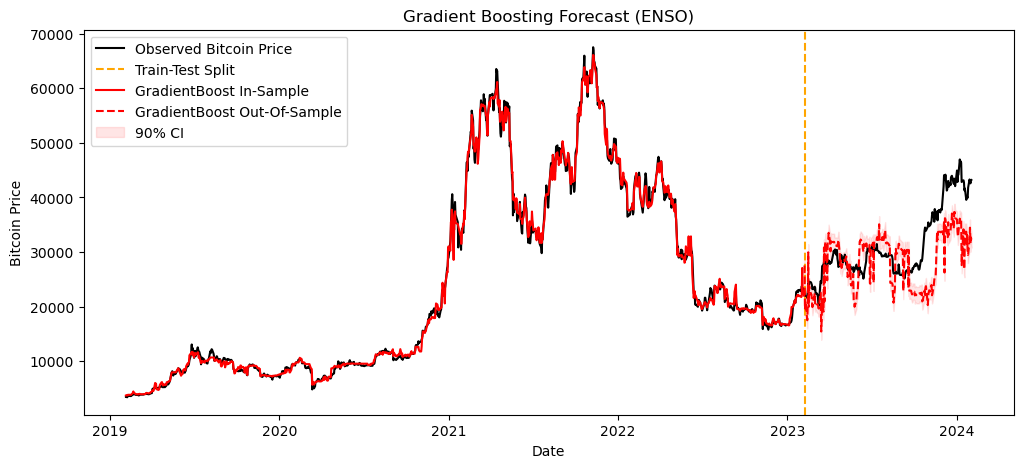

In [41]:
gb_model = GradientBoostingRegressor(n_estimators=100,
                                     learning_rate=0.1,
                                     max_depth=3,
                                     random_state=42)
gb_model.fit(train_X, train_y)

gb_in_sample = gb_model.predict(train_X)
gb_residuals = train_y.values - gb_in_sample
gb_out_of_sample = gb_model.predict(test_X)
gb_lower_ci, gb_upper_ci = bootstrap_confidence_intervals(gb_out_of_sample, gb_residuals)

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(y.index, y.values, label='Observed Bitcoin Price', color='black')
plt.axvline(x=y.index[split_index], color='orange', linestyle='--', label='Train-Test Split')

plt.plot(train_y.index, gb_in_sample, label='GradientBoost In-Sample', color='red')
plt.plot(test_y.index, gb_out_of_sample, label='GradientBoost Out-Of-Sample', color='red', linestyle='--')
plt.fill_between(test_y.index, gb_lower_ci, gb_upper_ci, color='red', alpha=0.1, label='90% CI')

plt.title("Gradient Boosting Forecast (ENSO)")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06826D+01    |proj g|=  5.43725D-05
  ys=-2.675E-01  -gs= 2.174E-01 BFGS update SKIPPED

At iterate    5    f=  8.88756D+00    |proj g|=  2.01845D-03

At iterate   10    f=  8.68989D+00    |proj g|=  9.81887D-05

At iterate   15    f=  8.59615D+00    |proj g|=  7.88429D-05

At iterate   20    f=  8.59177D+00    |proj g|=  6.54481D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     57      1     1     0   6.545D-06 

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


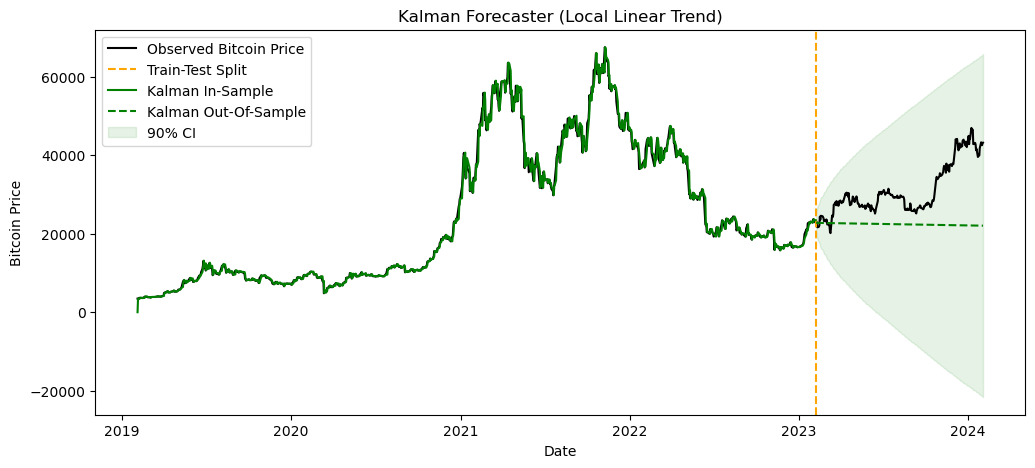

In [42]:
# We'll do a simple approach using UnobservedComponents (only on the target).
# If you want to incorporate the other variables, you'd do a more advanced statespace model.

from statsmodels.tsa.statespace.structural import UnobservedComponents

kalman_model = UnobservedComponents(endog=train_y, level='local linear trend')
kalman_results = kalman_model.fit()

# In-sample
kalman_in_sample = kalman_results.fittedvalues
kalman_residuals = train_y.values - kalman_in_sample.values

# Out-of-sample forecasting
n_test = len(test_y)
kalman_forecast_res = kalman_results.get_forecast(steps=n_test)
kalman_out_of_sample = kalman_forecast_res.predicted_mean
kalman_ci = kalman_forecast_res.conf_int(alpha=0.1)  # 90% CI from the model

print(f"this is kalman_ci{kalman_ci}")

# statsmodels directly gives upper and lower CI
kalman_lower_ci = kalman_ci['lower Bitcoin_Price']
kalman_upper_ci = kalman_ci['upper Bitcoin_Price']

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(y.index, y.values, label='Observed Bitcoin Price', color='black')
plt.axvline(x=y.index[split_index], color='orange', linestyle='--', label='Train-Test Split')

plt.plot(train_y.index, kalman_in_sample, label='Kalman In-Sample', color='green')
plt.plot(test_y.index, kalman_out_of_sample, label='Kalman Out-Of-Sample', color='green', linestyle='--')
plt.fill_between(test_y.index, kalman_lower_ci, kalman_upper_ci, color='green', alpha=0.1, label='90% CI')

plt.title("Kalman Forecaster (Local Linear Trend)")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()



In [43]:
print(filtered_data.index)
filtered_data.columns

RangeIndex(start=0, stop=1243, step=1)


Index(['Bitcoin_Price', 'Copper_Price', 'Platinum_Price', 'Ethereum_Price',
       'S&P_500_Price', 'Nasdaq_100_Price', 'Apple_Price', 'Tesla_Price',
       'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price',
       'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price',
       'Gold_Price', 'Date'],
      dtype='object')

2025-02-26 01:01:54.491630: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


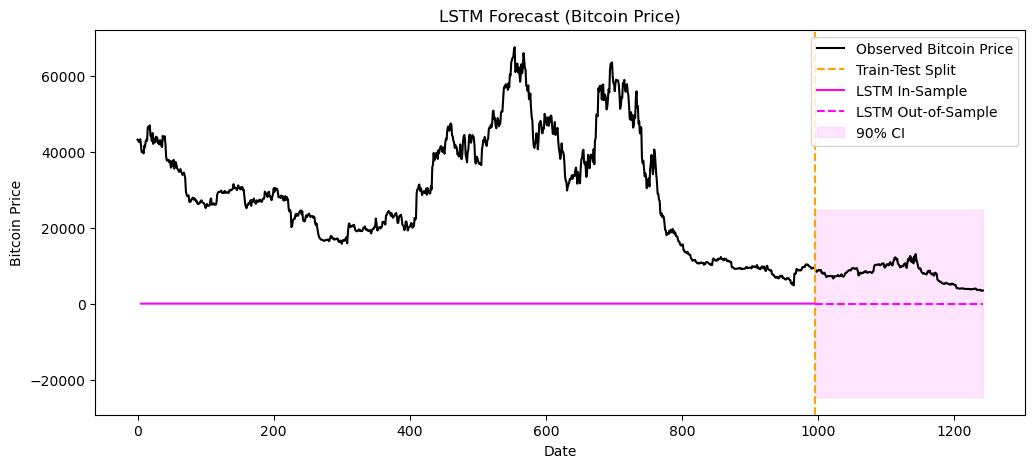

In [44]:
# We'll define the two helper functions from the instructions in a simpler form:
def create_sequences_multivariate(data, seq_length):
    """
    Create sequences from multivariate data for predicting all variables at the next time step.
    data: Numpy array of shape (n_samples, n_features)
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, :])  # sequence_length steps
        y.append(data[i + seq_length, :])  # next time step
    return np.array(X), np.array(y)


def build_optimized_lstm_model(sequence_length, num_features, units=50, dropout_rate=0.2):
    """
    Build a minimal LSTM model.
    We won't do multiple layers or complex hyperparams for brevity.
    """
    model = models.Sequential()
    model.add(layers.LSTM(units=units, input_shape=(sequence_length, num_features),
                          return_sequences=False, dropout=dropout_rate))
    model.add(layers.Dense(num_features))  # predict all features
    model.compile(loss='mse', optimizer='adam')
    return model


# Remove the 'Date' column as it is not needed
filtered_data_without_date = filtered_data.drop(columns=['Date'])

# Prepare data for LSTM (no 'Date' column)
data_values = filtered_data_without_date.values
num_features = data_values.shape[1]

# Define sequence length
seq_length = 5

# Create sequences
X_seq, y_seq = create_sequences_multivariate(data_values, seq_length)

# Split the sequences into train and test sets
split_index_lstm = int(0.8 * len(X_seq))
X_train_seq = X_seq[:split_index_lstm]
y_train_seq = y_seq[:split_index_lstm]
X_test_seq = X_seq[split_index_lstm:]
y_test_seq = y_seq[split_index_lstm:]

# Build the LSTM model
lstm_model = build_optimized_lstm_model(sequence_length=seq_length, num_features=num_features,
                                        units=32, dropout_rate=0.2)

# Fit the model
history = lstm_model.fit(X_train_seq, y_train_seq,
                         validation_split=0.1,
                         epochs=20,
                         batch_size=16,
                         verbose=0)

# In-sample and out-of-sample predictions
lstm_in_sample_preds = lstm_model.predict(X_train_seq)
lstm_out_of_sample_preds = lstm_model.predict(X_test_seq)

# Extract Bitcoin Price predictions (adjusted column name)
enso_index = filtered_data_without_date.columns.get_loc('Bitcoin_Price')  # Adjusted column name
lstm_in_sample_enso = lstm_in_sample_preds[:, enso_index]
lstm_out_sample_enso = lstm_out_of_sample_preds[:, enso_index]

# True values for Bitcoin Price
enso_train_true = y_train_seq[:, enso_index]
enso_test_true = y_test_seq[:, enso_index]

# Residuals from training
lstm_residuals = enso_train_true - lstm_in_sample_enso
lstm_lower_ci, lstm_upper_ci = bootstrap_confidence_intervals(lstm_out_sample_enso, lstm_residuals)

# Dates for plotting (using range of indexes corresponding to training and testing)
dates_array = filtered_data.index[seq_length:]  # Aligning to the sequence length

train_dates = dates_array[:split_index_lstm]
test_dates = dates_array[split_index_lstm:]

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(filtered_data.index, filtered_data['Bitcoin_Price'].values, label='Observed Bitcoin Price', color='black')  # Adjusted column name
plt.axvline(x=test_dates[0], color='orange', linestyle='--', label='Train-Test Split')

plt.plot(train_dates, lstm_in_sample_enso, label='LSTM In-Sample', color='magenta')
plt.plot(test_dates, lstm_out_sample_enso, label='LSTM Out-of-Sample', color='magenta', linestyle='--')
plt.fill_between(test_dates, lstm_lower_ci, lstm_upper_ci, color='magenta', alpha=0.1, label='90% CI')

plt.title("LSTM Forecast (Bitcoin Price)")
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.legend()
plt.show()


In [45]:

# Collect predictions from MLP, GB, Kalman to match test_y
# test_y is from index=split_index: to the end

# 1. MLP
mlp_pred_test = pd.Series(mlp_out_of_sample, index=test_y.index)

# 2. Gradient Boost
gb_pred_test = pd.Series(gb_out_of_sample, index=test_y.index)

# 3. Kalman
kalman_pred_test = kalman_out_of_sample
kalman_pred_test.index = test_y.index  # to align with test_y

# Evaluate each (train_y is used for MASE)
mlp_metrics_simple = compute_metrics(test_y.values, mlp_pred_test.values, train_y.values)
gb_metrics_simple = compute_metrics(test_y.values, gb_pred_test.values, train_y.values)
kalman_metrics_simple = compute_metrics(test_y.values, kalman_pred_test.values, train_y.values)

# For LSTM, we have a separate test set (enso_test_true) on test_dates
# We need to align it with test_y. The simplest approach is to compute metrics on that portion alone.
# We'll do direct:
lstm_metrics_simple = compute_metrics(enso_test_true, lstm_out_sample_enso, enso_train_true)

# Print as DataFrame
methods_simple = {
    'MLP': mlp_metrics_simple,
    'GradientBoost': gb_metrics_simple,
    'Kalman': kalman_metrics_simple,
    'LSTM': lstm_metrics_simple
}

df_simple_metrics = pd.DataFrame(methods_simple).T
df_simple_metrics


,max_error,MAE,MSE,RMSE,MAPE,MASE
MLP,9140.713446,2450.230851,9.629856e+06,3103.200914,7.410532,3.173298
GradientBoost,17534.567587,5078.117023,3.938922e+07,6276.082798,15.584134,6.576678
Kalman,24857.845126,8620.024720,1.166632e+08,10801.071788,25.041208,11.163808
LSTM,13053.926255,7774.403271,6.628413e+07,8141.506874,99.856242,8.938076


In [46]:
def mlp_constructor():
    return MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

def gb_constructor():
    return GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


# Rolling
mlp_rolling = rolling_forecast(mlp_constructor, train_X, train_y, test_X, test_y)
gb_rolling = rolling_forecast(gb_constructor, train_X, train_y, test_X, test_y)

mlp_rolling_metrics = compute_metrics(test_y.values, mlp_rolling, train_y.values)
gb_rolling_metrics = compute_metrics(test_y.values, gb_rolling, train_y.values)

# We won't do Kalman or LSTM rolling here for brevity.
rolling_methods = {
    'MLP': mlp_rolling_metrics,
    'GradientBoost': gb_rolling_metrics
}

df_rolling_metrics = pd.DataFrame(rolling_methods).T
df_rolling_metrics


,max_error,MAE,MSE,RMSE,MAPE,MASE
MLP,9841.553650,2679.660858,1.171229e+07,3422.322683,8.457574,3.470433
GradientBoost,7007.297701,1471.272858,4.056564e+06,2014.091345,4.750440,1.905448
